In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import ta
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt

In [2]:
df=yf.download('AAL',start='2015-01-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,53.900002,54.639999,53.320000,53.630001,50.814602,10626000
2015-01-02,54.279999,54.599998,53.070000,53.910000,51.079903,10748600
2015-01-05,54.369999,54.540001,53.340000,53.880001,51.051495,11565000
2015-01-06,54.270000,54.430000,52.130001,53.040001,50.255585,13772200
2015-01-07,53.380001,53.650002,52.119999,53.009998,50.227154,10069800
...,...,...,...,...,...,...
2023-03-06,16.469999,16.549999,16.100000,16.120001,16.120001,13504800
2023-03-07,16.240000,16.660000,16.139999,16.360001,16.360001,17951300
2023-03-08,16.410000,16.600000,16.270000,16.590000,16.590000,11399600


In [3]:
Opens=df.resample('D').first().Open
opens=Opens.bfill()

In [4]:
opens

Date
2014-12-31    53.900002
2015-01-01    54.279999
2015-01-02    54.279999
2015-01-03    54.369999
2015-01-04    54.369999
                ...    
2023-03-06    16.469999
2023-03-07    16.240000
2023-03-08    16.410000
2023-03-09    16.549999
2023-03-10    15.980000
Freq: D, Name: Open, Length: 2992, dtype: float64

In [5]:
def getlevels(date,first=True):
    if first:
        return opens[date],opens[date]*1.02
    else:
        return opens[date]*0.98,opens[date]

In [6]:
getlevels('2023-01-01')

(12.90999984741211, 13.168199844360352)

In [7]:
from datetime import date
from dateutil.relativedelta import relativedelta

In [8]:
def slicedf(dates):
    start=date(int(dates.split('-')[0]),int(dates.split('-')[1]),int(dates.split('-')[2]))
    end=start+relativedelta(months=9)
    return df[start:end]

In [9]:
df_t=slicedf('2022-12-01')
df_t

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-01,14.460000,14.570000,13.930000,13.980000,13.980000,26519600
2022-12-02,13.820000,13.980000,13.670000,13.970000,13.970000,24124300
2022-12-05,13.840000,14.340000,13.820000,14.110000,14.110000,27029000
2022-12-06,14.140000,14.340000,14.000000,14.330000,14.330000,20781500
2022-12-07,14.240000,14.240000,13.530000,13.550000,13.550000,28161400
...,...,...,...,...,...,...
2023-03-06,16.469999,16.549999,16.100000,16.120001,16.120001,13504800
2023-03-07,16.240000,16.660000,16.139999,16.360001,16.360001,17951300
2023-03-08,16.410000,16.600000,16.270000,16.590000,16.590000,11399600


In [10]:
in_position=False

for index,row in df_t.iterrows():
    if not in_position:
        levels=getlevels('2023-01-01')
        if row.Low<=levels[0]:
            print(index)
            print('Buy')
            in_position=True
    if in_position:
        if row.High >=levels[1]:
            print(index)
            print('Sold')
            in_position=False

2022-12-15 00:00:00
Buy
2022-12-15 00:00:00
Sold
2022-12-16 00:00:00
Buy
2022-12-21 00:00:00
Sold
2022-12-22 00:00:00
Buy
2023-01-04 00:00:00
Sold


In [11]:
position_arr=[False,False]
buy_index,buy_price=[],[]
sell_index,sell_price=[],[]
second_buy_index,second_buy_price=[],[]
second_sell_index,second_sell_price=[],[]
dates='2021-01-01'
df_t=slicedf(dates)
for index,row in df_t.iterrows():
    if not position_arr[0]:
        firstlevels=getlevels(dates)
        secondlevels=getlevels(dates,first=False)
        if row.Close<=firstlevels[0]:
            print('Buy')
            position_arr[0]=True
            buy_index.append(index)
            buy_price.append(row.Close)
    if position_arr[0] and not position_arr[1]:
        if row.Close<=secondlevels[0]:
            print('Buy Second')
            position_arr[1]=True
            second_buy_index.append(index)
            second_buy_price.append(row.Close)
        if row.Close>=firstlevels[1]:
            print('sell')
            position_arr[0]=False
            sell_index.append(index)
            sell_price.append(row.Close)
    if position_arr[1]:
        if row.Close>=secondlevels[1]:
            print('Sell second')
            position_arr[1]=False
            second_sell_index.append(index)
            second_sell_price.append(row.Close)

Buy
Buy Second
Sell second
sell
Buy
Buy Second
Sell second
sell


(array([737791., 737822., 737850., 737881., 737911., 737942., 737972.,
        738003., 738034., 738064.]),
 <a list of 10 Text xticklabel objects>)

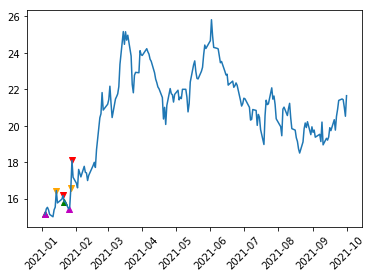

In [12]:
plt.plot(np.array(df_t.index),df_t.Close.values)
plt.scatter(np.array(buy_index),buy_price,marker='^',color='g')
plt.scatter(np.array(second_buy_index),second_buy_price,marker='^',color='m')
plt.scatter(np.array(second_sell_index),second_sell_price,marker='v',color='orange')
plt.scatter(np.array(sell_index),sell_price,marker='v',color='r')
plt.xticks(rotation=45)